**Домашнее задание**

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель 
(например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB (TMDB 5000 Movie Dataset, https://www.kaggle.com/tmdb/tmdb-movie-metadata);

Данные NYC (New York City Taxi Trip Duration, https://www.kaggle.com/c/nyc-taxi-trip-duration);

Данные NBA (NBA Players stats since 1950, https://www.kaggle.com/drgilermo/nba-players-stats).

In [89]:
#увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [90]:
# Результаты исследования Всемирного банка (за 2017 г.) человеческого капитала. 
# https://www.worldbank.org/en/publication/human-capital.
# Человеческий капитал – это здоровье, навыки, знания и опыт населения. Характеризуется индексом Human Capital Index.
# Из всех индикаторов выбираем Human Capital Index (HCI) (scale 0-1) и группу стран, выделенных по уровню доходов, в которую
# входит Россия, чтобы посмотреть, какую позицию в рейтинге по этому показателю она занимает.
# (Если брать общий рейтинг, то Россия оказывается на 34-ом месте из 157 стран.)
# Для визуализации выбрана столбчатая диаграмма, она, вполне, отвечает задаче.

indicators = pd.read_csv('HCIData.csv', sep=',') 
indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2017,Unnamed: 5
0,Afghanistan,AFG,Expected Years of School,HD.HCI.EYRS,8.580,NaN
1,Afghanistan,AFG,"Expected Years of School, Female",HD.HCI.EYRS.FE,6.730,NaN
2,Afghanistan,AFG,"Expected Years of School, Male",HD.HCI.EYRS.MA,9.210,NaN
3,Afghanistan,AFG,Fraction of Children Under 5 Not Stunted,HD.HCI.STNT,0.591,NaN
4,Afghanistan,AFG,"Fraction of Children Under 5 Not Stunted, Female",HD.HCI.STNT.FE,NaN,NaN


In [91]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 6 columns):
Country Name      4239 non-null object
Country Code      4239 non-null object
Indicator Name    4239 non-null object
Indicator Code    4239 non-null object
2017              3709 non-null float64
Unnamed: 5        0 non-null float64
dtypes: float64(2), object(4)
memory usage: 198.8+ KB


In [92]:
indicators['Indicator Name'].unique() # доступные индикаторы

array(['Expected Years of School', 'Expected Years of School, Female',
       'Expected Years of School, Male',
       'Fraction of Children Under 5 Not Stunted',
       'Fraction of Children Under 5 Not Stunted, Female',
       'Fraction of Children Under 5 Not Stunted, Male',
       'Harmonized Test Scores', 'Harmonized Test Scores, Female',
       'Harmonized Test Scores, Male',
       'Human Capital Index (HCI) (scale 0-1)',
       'Human Capital Index (HCI), Female (scale 0-1)',
       'Human Capital Index (HCI), Female, Lower Bound (scale 0-1)',
       'Human Capital Index (HCI), Female, Upper Bound (scale 0-1)',
       'Human Capital Index (HCI), Lower Bound (scale 0-1)',
       'Human Capital Index (HCI), Male (scale 0-1)',
       'Human Capital Index (HCI), Male, Lower Bound (scale 0-1)',
       'Human Capital Index (HCI), Male, Upper Bound (scale 0-1)',
       'Human Capital Index (HCI), Upper Bound (scale 0-1)',
       'Learning-Adjusted Years of School',
       'Learning-Ad

In [93]:
countries = pd.read_csv('HCIcountry.csv', sep=',') 
countries.rename(columns={'country Code': 'Country Code'}, inplace=True)
countries.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2017.0,NaN,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN,NaN
3,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,NaN,Middle East & North Africa,High income,AE,...,Enhanced General Data Dissemination System (e-...,2010,"World Health Survey, 2003",NaN,NaN,2012,1985.0,2017.0,NaN,NaN
4,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,High income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2016",Yes,2008,2002.0,2017.0,NaN,NaN


In [94]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 32 columns):
Country Code                                         157 non-null object
Short Name                                           157 non-null object
Table Name                                           157 non-null object
Long Name                                            157 non-null object
2-alpha code                                         156 non-null object
Currency Unit                                        157 non-null object
Special Notes                                        91 non-null object
Region                                               157 non-null object
Income Group                                         157 non-null object
WB-2 code                                            156 non-null object
National accounts base year                          157 non-null object
National accounts reference year                     51 non-null float64
SNA price valuation 

In [95]:
df = indicators.merge(countries, how = 'left', on = 'Country Code')
# df.head()
df[['Country Name', 'Country Code', 'Indicator Name', 'Income Group', '2017']].head(10)

,Country Name,Country Code,Indicator Name,Income Group,2017
0,Afghanistan,AFG,Expected Years of School,Low income,8.580
1,Afghanistan,AFG,"Expected Years of School, Female",Low income,6.730
2,Afghanistan,AFG,"Expected Years of School, Male",Low income,9.210
3,Afghanistan,AFG,Fraction of Children Under 5 Not Stunted,Low income,0.591
4,Afghanistan,AFG,"Fraction of Children Under 5 Not Stunted, Female",Low income,NaN
5,Afghanistan,AFG,"Fraction of Children Under 5 Not Stunted, Male",Low income,NaN
6,Afghanistan,AFG,Harmonized Test Scores,Low income,355.000
7,Afghanistan,AFG,"Harmonized Test Scores, Female",Low income,350.000
8,Afghanistan,AFG,"Harmonized Test Scores, Male",Low income,358.000
9,Afghanistan,AFG,Human Capital Index (HCI) (scale 0-1),Low income,0.389


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4238
Data columns (total 37 columns):
Country Name                                         4239 non-null object
Country Code                                         4239 non-null object
Indicator Name                                       4239 non-null object
Indicator Code                                       4239 non-null object
2017                                                 3709 non-null float64
Unnamed: 5                                           0 non-null float64
Short Name                                           4239 non-null object
Table Name                                           4239 non-null object
Long Name                                            4239 non-null object
2-alpha code                                         4212 non-null object
Currency Unit                                        4239 non-null object
Special Notes                                        2457 non-null object
Region

In [97]:
df_HCI = df[['Country Name', 'Country Code', 'Indicator Name', 'Income Group', '2017']][(df['Indicator Name']=='Human Capital Index (HCI) (scale 0-1)') & (df['Income Group']=='Upper middle income')].sort_values('2017', ascending=False).head(10)
df_HCI.head(10)

,Country Name,Country Code,Indicator Name,Income Group,2017
3276,Serbia,SRB,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.755
1845,Kazakhstan,KAZ,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.746
3168,Russian Federation,RUS,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.729
441,Bulgaria,BGR,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.676
657,China,CHN,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.673
2439,Mauritius,MUS,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.626
3870,Turkey,TUR,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.626
2331,Malaysia,MYS,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.622
36,Albania,ALB,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.621
792,Costa Rica,CRI,Human Capital Index (HCI) (scale 0-1),Upper middle income,0.619


In [98]:
# plt.barh(df_HCI['Country Name'], df_HCI['2017'])

Text(0.5, 1.0, 'Top-10 countries in Human Capital Index \n (group: upper middle income)')

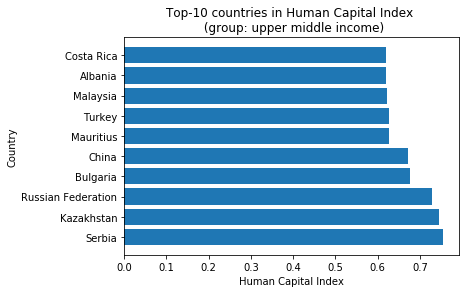

In [99]:
plt.barh(df_HCI['Country Name'], df_HCI['2017'])
plt.xlabel('Human Capital Index')
plt.ylabel('Country')
plt.title('Top-10 countries in Human Capital Index \n (group: upper middle income)')

In [41]:
# Следующая визуализация - с использованием данных того же датафрейма.
# Задача - продемонстрировать, что Индекс человеческого капитала зависит от уровня дохода страны (т.е. выделение групп по доходу
# обосновано). А также посмотреть на соотношение основных статистических показателей в группах.
# Для этого выбрана диаграмма типа Box plot.
# Диаграмма показывает, что в группах стран с большим доходом медиана распределения показателя Индекса человеческого капитала
# выше (или даже: с ростом доходов индекс человеческого капитала растет).

In [103]:
df_HCI_all = df[['Country Name', 'Country Code', 'Indicator Name', 'Income Group', '2017']]\
[df['Indicator Name']=='Human Capital Index (HCI) (scale 0-1)']

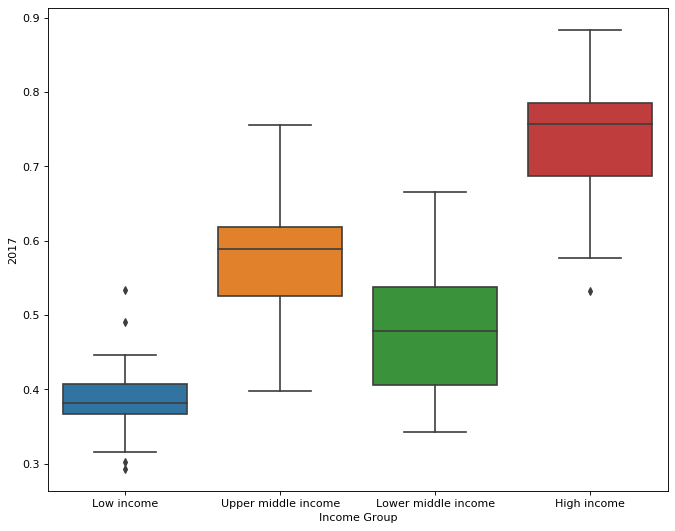

In [104]:
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="Income Group", y="2017", data=df[df.isin(df_HCI_all)])

In [44]:
# Следующая визуализация - на данных Финам об изменении мировых индексов 
# https://www.finam.ru/profile/mirovye-indeksy/micex/
# Взяты данные за год для двух индексов - Shanghai Composite (Китай) и S&P-500 (США). 
# Задача визуализации - продемонстрировать, насколько по-разному они отреагировали на распространение короновирусной инфекции.
# Для этого выбран линейный график изменения значения индексов, хорошо отражающий динамику показателей.

In [45]:
finam_2 = pd.concat(map(pd.read_csv, ['NSHANGHAI_190210_200214.csv', 'NSANDP-500_190210_200214.csv'])).reset_index(drop=True)

In [46]:
finam_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
<TICKER>    503 non-null object
<PER>       503 non-null object
<DATE>      503 non-null int64
<TIME>      503 non-null int64
<OPEN>      503 non-null float64
<HIGH>      503 non-null float64
<LOW>       503 non-null float64
<CLOSE>     503 non-null float64
<VOL>       503 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.4+ KB


In [47]:
finam_2['<DATE>'] = finam_2['<DATE>'].astype(str)

In [48]:
finam_2['<DATE>'] = pd.to_datetime(finam_2['<DATE>'])

In [49]:
finam_2.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SHANGHAI,D,2019-02-11,0,2613.1742,2654.0316,2613.1742,2653.8960,2454
1,SHANGHAI,D,2019-02-12,0,2654.0349,2674.3894,2648.9075,2671.8937,2925
2,SHANGHAI,D,2019-02-13,0,2674.5198,2727.0750,2666.5220,2721.0683,3482
3,SHANGHAI,D,2019-02-14,0,2715.5358,2729.2802,2707.8287,2719.6999,3152
4,SHANGHAI,D,2019-02-15,0,2712.7862,2715.3988,2679.9861,2682.3850,3212


In [50]:
# нагляднее будет, если использовать не значения индексов, а их изменение (в %) к предыдущему дню:
finam_2.loc[finam_2['<TICKER>'] == 'SHANGHAI', 'DIFF'] = 100*(finam_2['<CLOSE>'].diff() / finam_2['<CLOSE>'].shift(1))

In [51]:
finam_2.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,DIFF
0,SHANGHAI,D,2019-02-11,0,2613.1742,2654.0316,2613.1742,2653.8960,2454,NaN
1,SHANGHAI,D,2019-02-12,0,2654.0349,2674.3894,2648.9075,2671.8937,2925,0.678161
2,SHANGHAI,D,2019-02-13,0,2674.5198,2727.0750,2666.5220,2721.0683,3482,1.840440
3,SHANGHAI,D,2019-02-14,0,2715.5358,2729.2802,2707.8287,2719.6999,3152,-0.050289
4,SHANGHAI,D,2019-02-15,0,2712.7862,2715.3988,2679.9861,2682.3850,3212,-1.372023


In [52]:
finam_2.loc[finam_2['<TICKER>'] == 'SANDP-500', 'DIFF'] = 100*(finam_2['<CLOSE>'].diff() / finam_2['<CLOSE>'].shift(1))

In [53]:
finam_2['DIFF'].fillna(0, inplace = True)
finam_2.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,DIFF
0,SHANGHAI,D,2019-02-11,0,2613.1742,2654.0316,2613.1742,2653.8960,2454,0.000000
1,SHANGHAI,D,2019-02-12,0,2654.0349,2674.3894,2648.9075,2671.8937,2925,0.678161
2,SHANGHAI,D,2019-02-13,0,2674.5198,2727.0750,2666.5220,2721.0683,3482,1.840440
3,SHANGHAI,D,2019-02-14,0,2715.5358,2729.2802,2707.8287,2719.6999,3152,-0.050289
4,SHANGHAI,D,2019-02-15,0,2712.7862,2715.3988,2679.9861,2682.3850,3212,-1.372023


In [54]:
# finam_2.loc[finam_2['DIFF'] == 0]

In [55]:
# finam_2.loc[finam_2['<TICKER>'] == 'SANDP-500'].head()
# finam_2.loc[(finam_2['<TICKER>'] == 'SANDP-500') & (finam_2['<DATE>'] > '2019-12-31')].head()

In [56]:
# Для демонстрации можно ограничиться только текущим годом:
# finam_sp=finam_2.loc[finam_2['<TICKER>'] == 'SANDP-500', ['<TICKER>','<DATE>','DIFF']]
finam_sp=finam_2.loc[(finam_2['<TICKER>'] == 'SANDP-500') & (finam_2['<DATE>'] > '2019-12-31'), ['<TICKER>','<DATE>','DIFF']]
# finam_sh=finam_2.loc[finam_2['<TICKER>'] == 'SHANGHAI', ['<TICKER>','<DATE>','DIFF']]
finam_sh=finam_2.loc[(finam_2['<TICKER>'] == 'SHANGHAI') & (finam_2['<DATE>'] > '2019-12-31'), ['<TICKER>','<DATE>','DIFF']]

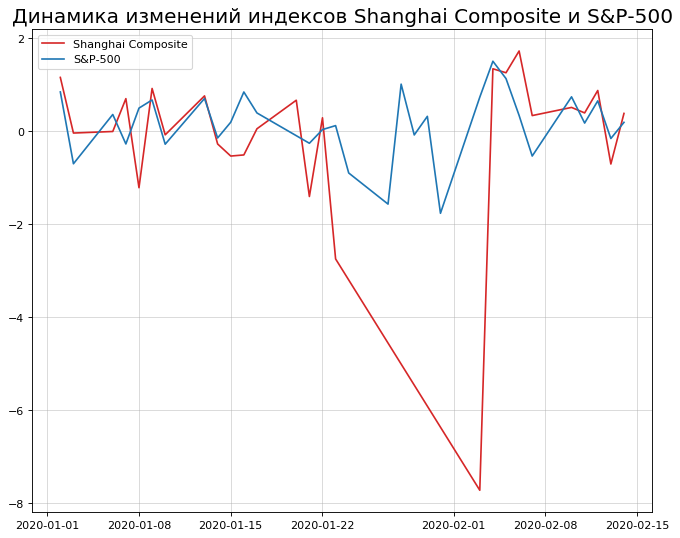

In [59]:
plt.figure(figsize=(10,8), dpi= 80)
plt.plot('<DATE>', 'DIFF', data=finam_sh, color='tab:red', label='Shanghai Composite')
plt.plot('<DATE>', 'DIFF', data=finam_sp, color='tab:blue', label='S&P-500')
plt.title("Динамика изменений индексов Shanghai Composite и S&P-500", fontsize=18)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.5)
plt.grid(axis='x', alpha=.5)

In [58]:
# Индекс Shanghai Composite (Китай) в день открытия китайских бирж после новогодних праздников резко упал.

In [60]:
# Следующий датасет содержит характеристики португальских красных вин Vinho Verde.
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data#winequality-red.csv
# В нем есть набор физико-химических показателей и результаты теста - воспринимаемое качество.
# Задача визуализации - посмотреть, как связаны отдельные показатели и как влияют на качество вина. 
# Для этих целей хорошо подходит матрица pair plot и joint_plot (чтобы получить представление о распределениях показателей).

In [61]:
rw = pd.read_csv('winequality-red.csv', sep=',') 
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
# Input variables (based on physicochemical tests):
# fixed acidity - фиксированная кислотность
# volatile acidity - летучая кислотность
# citric acid - лимонная кислота
# residual sugar - остаточный сахар
# chlorides - хлориды
# free sulfur dioxide - свободный диоксид серы
# total sulfur dioxide - общий диоксид серы
# density - плотность
# pH -
# sulphates - сульфаты
# alcohol -
# Output variable (based on sensory data):
# quality (score between 0 and 10) -


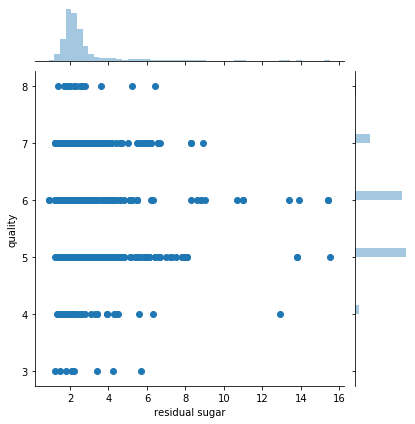

In [64]:
sns.jointplot(x='residual sugar', y='quality', 
              data=rw, kind='scatter')
# самые высокие оценки получали только вина с содержанием остаточного сахара не более 6,5 пунктов 

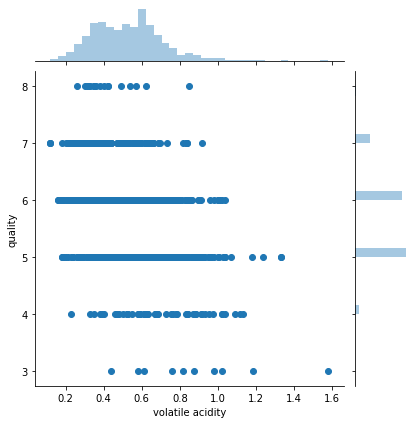

In [65]:
sns.jointplot(x='volatile acidity', y='quality', 
              data=rw, kind='scatter')
# самые высокие оценки получали только вина с показателем летучей кислотности до 0,85-0,9

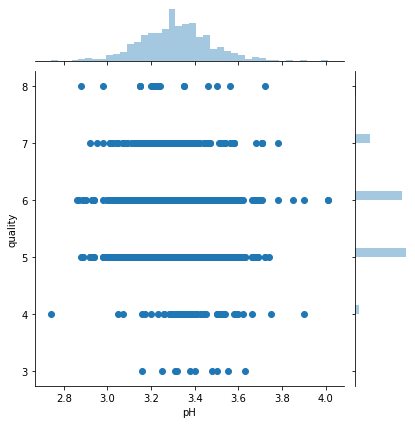

In [66]:
sns.jointplot(x='pH', y='quality', 
              data=rw, kind='scatter')
# как и большинство вин, анализируемые вина имеют показатель pH в диапазоне от 3 до 4.

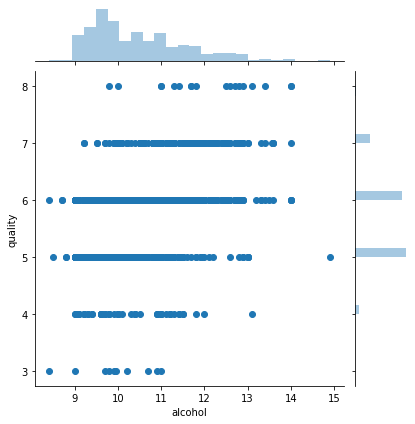

In [67]:
sns.jointplot(x='alcohol', y='quality', 
              data=rw, kind='scatter')
# самые низкие оценки получили вина с содержанием алкоголя не более 11 пунктов; с ростом содержания алкоголя оценки, похоже, 
# растут, но, как и в случае предыдущих показателей, большинство оценок - это 5 и 6 

In [68]:
# sns.jointplot(x='density', y='fixed acidity', 
#               data=rw, kind='scatter')

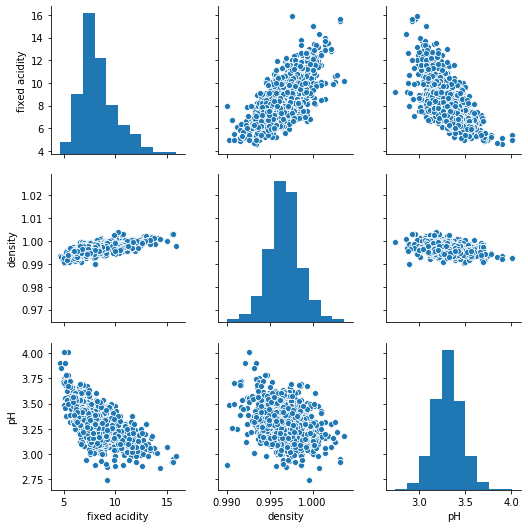

In [69]:
sns.pairplot(rw[['fixed acidity', 'density', 'pH']])

In [70]:
# Для выбранных показателей можно обнаружить наличие связи между изменением, например, density и fixed acidity (прямая)
# и между pH и fixed acidity (обратная)

In [71]:
# Следующая визуализация - по данным из турнирных таблиц Английской премьер-лиги (футбол) за период с 1968 по 2019 г.г.
# https://www.kaggle.com/birdogd/english-football-premier-league-tables-19682019
# Основная задача - показать, какие команды по итогам этого периода самые титулованные (по количеству чемпионств) и 
# какова результативность ведущих команд.
# Выбраны - столбчатая диаграмма (наглядно и просто для восприятия) и точечная, с пузырями. 

In [72]:
fb = pd.read_csv('tables_1968_2019.csv', sep=',') 
fb.head()

,season,name,pos,team,p,w,d,l,f,a,gd,points
0,2018/2019,Premier League 2018-2019,1,Manchester City,38,32,2,4,95,23,72,98
1,2018/2019,Premier League 2018-2019,2,Liverpool,38,30,7,1,89,22,67,97
2,2018/2019,Premier League 2018-2019,3,Chelsea,38,21,9,8,63,39,24,72
3,2018/2019,Premier League 2018-2019,4,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,2018/2019,Premier League 2018-2019,5,Arsenal,38,21,7,10,73,51,22,70


In [73]:
# fb.info()

In [74]:
fb.loc[(fb['name'] == 'Premier League 2018-2019')].head() # описание данных отсутствует, сопоставляем с таблицей из др. источников

,season,name,pos,team,p,w,d,l,f,a,gd,points
0,2018/2019,Premier League 2018-2019,1,Manchester City,38,32,2,4,95,23,72,98
1,2018/2019,Premier League 2018-2019,2,Liverpool,38,30,7,1,89,22,67,97
2,2018/2019,Premier League 2018-2019,3,Chelsea,38,21,9,8,63,39,24,72
3,2018/2019,Premier League 2018-2019,4,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,2018/2019,Premier League 2018-2019,5,Arsenal,38,21,7,10,73,51,22,70


In [75]:
fb_win = fb.pivot_table(index = 'team', columns = 'pos', values = 'p', aggfunc = 'count', fill_value = 0).sort_values(by = 1, ascending=False)

In [76]:
fb_win.head()

pos,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
team,,,,,,,,,,,,,,,,,,,,,
Manchester United,13,10,6,4,1,4,1,4,1,1,...,1,0,0,0,0,1,0,0,1,0
Liverpool,11,12,7,7,5,4,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
Arsenal,6,7,6,12,6,3,3,1,1,3,...,0,0,0,1,1,0,0,0,0,0
Chelsea,5,4,6,2,4,8,1,0,0,1,...,0,3,0,1,1,1,0,0,1,1
Manchester City,5,3,2,3,3,0,0,3,3,3,...,1,3,3,2,2,2,0,1,1,0


In [77]:
df=fb_win[[1]].reset_index().head(5) # отбираем 5-ку по количеству чемпионств
df

pos,team,1
0,Manchester United,13
1,Liverpool,11
2,Arsenal,6
3,Chelsea,5
4,Manchester City,5


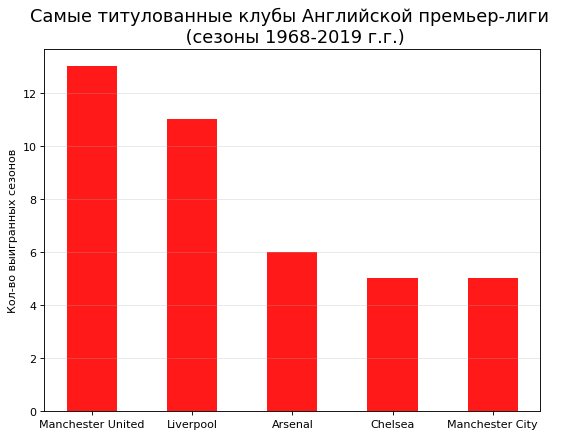

In [78]:
plt.subplots(figsize=(8,6), facecolor='white', dpi= 80)
plt.bar(df['team'], df[1], width=0.5, color='red', alpha=0.9)
plt.ylabel('Кол-во выигранных сезонов')
plt.title('Самые титулованные клубы Английской премьер-лиги \n (сезоны 1968-2019 г.г.)', fontdict={'size':16})
plt.xticks(df.index, df.team, rotation=0, horizontalalignment='center', fontsize=10)
plt.grid(axis = 'y', alpha=0.3)

In [79]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [80]:
df1=fb.groupby('team').agg({'pos': 'count', 'p': 'sum', 'f': 'sum', 'gd': 'sum', 'points': 'sum'})\
        .sort_values('points', ascending=False)

In [81]:
df1.head()

,pos,p,f,gd,points
team,,,,,
Liverpool,52,2074,3505,1616,3519
Manchester United,51,2032,3467,1400,3514
Arsenal,52,2074,3328,1232,3390
Tottenham Hotspur,51,2032,2967,371,2836
Everton,52,2074,2837,377,2806


In [82]:
df1['points_per_seasons'] = df1['points'] / df1['pos'] # считаем показатели результативности
df1['goals_per_match'] = df1['f'] / df1['p']
# df1.reset_index()

In [83]:
df1.head()

,pos,p,f,gd,points,points_per_seasons,goals_per_match
team,,,,,,,
Liverpool,52,2074,3505,1616,3519,67.673077,1.689971
Manchester United,51,2032,3467,1400,3514,68.901961,1.706201
Arsenal,52,2074,3328,1232,3390,65.192308,1.604629
Tottenham Hotspur,51,2032,2967,371,2836,55.607843,1.460138
Everton,52,2074,2837,377,2806,53.961538,1.367888


In [84]:
df_ch=fb_win[[1]]
df_ch.head()

pos,1
team,
Manchester United,13
Liverpool,11
Arsenal,6
Chelsea,5
Manchester City,5


In [85]:
df = df_ch.join(df1, how='left')

In [86]:
df1 = df.head(10)

In [87]:
trace0 = go.Scatter(
    x=df1.points_per_seasons,
    y=df1.goals_per_match,
    mode = 'markers+text',
    text = df1.index,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Результативность 10 ведущих клубов', 'yaxis': {'title': 'Среднее кол-во голов за матч'}, 
          'xaxis': {'title': 'Среднее количество очков в сезоне'}}


fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [88]:
trace0 = go.Scatter(
    x=df1.points_per_seasons,
    y=df1.goals_per_match,
    mode = 'markers+text',
    text = df1.index,
    textposition='top center',
#     textposition='',
    marker = dict(
        size = 8*df1[1],
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory'
        ]
    )
)

data = [trace0]
layout = {'title': 'Результативность 10 ведущих клубов', 'yaxis': {'title': 'Среднее кол-во голов за матч'}, 
          'xaxis': {'title': 'Среднее количество очков в сезоне'}}


fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)




In [ ]:
# размер "пузырей" - это кол-во чемпионств